In [155]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
air = pd.read_csv("annual_conc_by_monitor_2017.csv")

In [51]:
air.loc[0]

State Code                                                                       1
County Code                                                                      3
Site Num                                                                        10
Parameter Code                                                               44201
POC                                                                              1
Latitude                                                                   30.4975
Longitude                                                                 -87.8803
Datum                                                                        NAD83
Parameter Name                                                               Ozone
Sample Duration                                                             1 HOUR
Pollutant Standard                                         Ozone 1-hour Daily 2005
Metric Used                      Daily maxima of observed hourly values (betwee...
Meth

In [52]:
air['Parameter Name'].value_counts()

PM2.5 - Local Conditions                  6654
Ozone                                     5136
Sulfur dioxide                            2298
PM10 Total 0-10um STP                     1326
Acceptable PM2.5 AQI & Speciation Mass     879
Nitrogen dioxide (NO2)                     848
Outdoor Temperature                        839
Wind Direction - Resultant                 720
Wind Speed - Resultant                     715
Average Ambient Temperature                674
Average Ambient Pressure                   671
Carbon monoxide                            575
Wind Speed - Scalar                        516
Nitric oxide (NO)                          479
PM10 - LC                                  470
Std Dev Hz Wind Direction                  449
Relative Humidity                          412
Oxides of nitrogen (NOx)                   395
Sample Volume                              392
Sample Flow Rate- CV                       336
Elapsed Sample Time                        334
Sample Max Ba

In [150]:
def nation_plot(pollutant, cutoff, metric):
    air2 = air[air['Parameter Name'] == pollutant]

    upper = air2[metric].quantile(1-cutoff)
    lower = air2[metric].quantile(cutoff)
    air2 = air2[air2[metric] < upper]
    air2 = air2[air2[metric] > lower]    

    air2.plot(kind='scatter', x='Longitude', y='Latitude',c=air2[metric], colormap='RdYlGn', s = 5)
    plt.ylim ((15,55))
    plt.xlim((-135,-60))
    plt.show()
    print air2["Units of Measure"].value_counts()

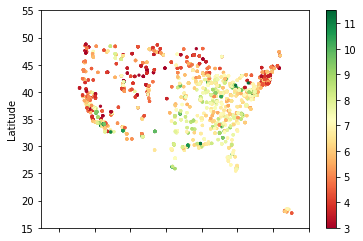

Micrograms/cubic meter (LC)    6279
Name: Units of Measure, dtype: int64


In [151]:
nation_plot('PM2.5 - Local Conditions', .025, '50th Percentile')

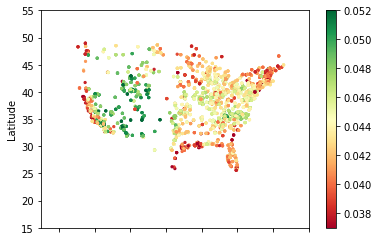

Parts per million    4504
Name: Units of Measure, dtype: int64


In [152]:
nation_plot('Ozone',.05 , '50th Percentile')

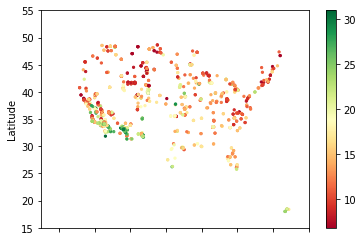

Micrograms/cubic meter (25 C)    1174
Name: Units of Measure, dtype: int64


In [154]:
nation_plot('PM10 Total 0-10um STP',.05 , '50th Percentile')